# Imports and Constraints

# Defines

In [308]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from collections import Counter
import category_encoders as ce
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator


def load_data() -> pd.Series:
    csv_train = pd.read_csv('train.txt', sep=" ").assign(train = 1) 
    csv_test = pd.read_csv('testx.txt', sep=" ").assign(train = 0)
    csv = pd.concat([csv_train,csv_test])
    classes = csv['class']
    csv = csv.drop(['class'], axis=1)
#     print(f"class0: {percentage0}%,\tclass1: {percentage1}%")
    return csv, classes

def del_nans(nans_perc):
    # Find those where nans is over nans_perc
    global csv, nans
    na = csv.isna().sum()
    del_na = na[na >= nans_perc*len(csv)]
    csv = csv.drop(del_na.index.values, axis=1)
    nans = nans_ctr()
    
def nans_ctr() -> pd.Series:
    return csv.isna().sum()

def unique_ctr() -> pd.Series():
    unique = pd.Series()
    for col in list(csv_org):
    #     len(csv[col].unique().astype(int))
    #     print(f"col {col}\t unique: {len(csv[col].unique())}")
        if(csv.columns.contains(col) and (col != 'train')):
            unique.at[col] = len(csv[col].unique())
#     print(unique.head(5))
    return unique
def val_types() -> pd.Series():
    val_type = pd.Series()
    for col in list(csv_org):
        if not csv.columns.contains(col) or col == 'train':
            continue
        if csv[col].dtype == np.float64:
            val_type.at[col] = np.float64
        elif csv[col].dtype == np.int64:
            val_type.at[col] = np.int64
        elif csv[col].dtype == np.int32:
            val_type.at[col] = np.int32
        elif csv[col].dtype == object:
            val_type.at[col] = object
        else:
            print(f"No common value type found in val_types() - {csv[col].dtype}")
#     print(f"float: {sum(val_type == np.float64)}")
#     print(f"int: {sum(val_type == np.int64)}")
#     print(f"string: {sum(val_type == object)}")
    return val_type
def stat(f):
    nans = nans_ctr()
    unique = unique_ctr()
    val_type = val_types()
    print(f"min: {csv[f].min()}")
    print(f"max: {csv[f].max()}")
    print(f"nans: {nans[f]}")
    print(f"unique: {unique[f]}")
    print(f"val_type: {val_type[f]}")
    print(f"vals per class: {round((len(csv)-nans[f])/unique[f],2)}")
    
def plot(data, sort=False, log=True, small=False, fontsize=7):
    if small:
        figsize = (8,4)
    else:
        figsize = (20,10)
    letter_counts = Counter(data)
    df = pd.DataFrame.from_dict(letter_counts, orient='index')
    if sort:
        ax = df.sort_values(by=0, ascending=False).plot(grid=True,kind='bar', logy = log, figsize=figsize, legend=False)
    else:
        ax = df.plot(grid=True,kind='bar', logy = log, figsize=figsize, legend=False)
    plt.xticks(fontsize=fontsize, rotation=90)
    plt.show()
    
def threshold_factorization(data, *t_list) -> pd.Series():
    letter_counts = Counter(data)
    df = pd.DataFrame.from_dict(letter_counts, orient='index')
    df = df.sort_values(by=0, ascending=False)
    t_list = (df.values[0].item()+1,) + t_list + (0,)
    out = data.copy()
#     print(f"all labels: {len(letter_counts)}")
    for i in tqdm(range(1,len(t_list)),desc="Progress",leave=False):
        idx = df[(df>t_list[i]).values & (df<=t_list[i-1]).values].index
#         print(f"labels in range ({t_list[i]}, {t_list[i-1]}): {len(idx)}")
        for j in tqdm(idx,leave=False):
            out.loc[out == j] = i
    return out

def factorize(data) -> pd.Series():
#     series = data.fillna(-1)
    series = data.copy()
    labels, _ = pd.factorize(series)
    series = labels[:len(series)]
    return series

def cast(data, lower_t, upper_t) -> pd.Series():
#     print(f"Casting with max , min = ({lower_t},{upper_t})")
    data = data.sort_values()
    data[data<lower_t] = lower_t
    data[data>upper_t] = upper_t
    return data

def standarize(df) ->pd.Series():
    return round((df-df.min())/(df.max()-df.min()),4)

def one_hot_encoding(f):
    global csv
    ohe = ce.OneHotEncoder(cols = [f], handle_unknown='ignore', use_cat_names=True)
    csv[f] = csv[f].fillna(-1)
    new_features = ohe.fit_transform(csv[f].to_frame())
    csv = csv.drop([f],axis=1)
    csv = pd.concat([csv,new_features],axis=1)
    
def binary_encoding(f):
    global csv
    ohe = ce.BinaryEncoder(cols = [f], handle_unknown='ignore',drop_invariant=True)
    csv[f] = csv[f].fillna(-1)
    new_features = ohe.fit_transform(csv[f].to_frame())
    csv = csv.drop([f],axis=1)
    csv = pd.concat([csv,new_features],axis=1)  
def delete(f):
    global csv
    csv[f] = csv_org[f]
    csv = csv.drop(f, axis=1)

# Data Cleaning

In [309]:
csv,classes = load_data()
csv_org = csv.copy()
nans = nans_ctr()
unique = unique_ctr()
val_type = val_types()
print(max(nans))
del_nans(0.99)
print(max(nans))
print(len(csv.columns))

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


50000
49442
207


# Data Preprocessing

In [531]:
for col in csv.columns:
    print(col,end="")
    print(f" min: {csv[col].min()}\tmax: {csv[col].max()}")

Var1 min: 0.0	max: 1.0
Var10 min: 0.0	max: 1.0
Var100 min: 0.0	max: 1.0
Var103 min: 0.0	max: 1.0
Var104 min: 0.0	max: 1.0
Var107 min: 0.0	max: 1.0
Var109 min: 0.0	max: 1.0
Var11 min: 0.0	max: 1.0
Var110 min: 0.0	max: 1.0
Var111 min: 0.0	max: 1.0
Var112 min: 0.0	max: 1.0
Var114 min: 0.0	max: 1.0
Var115 min: 0.0	max: 1.0
Var117 min: 0.0	max: 1.0
Var119 min: 0.0	max: 1.0
Var12 min: 0.0	max: 1.0
Var120 min: 0.0	max: 1.0
Var121 min: 0.0	max: 1.0
Var123 min: 0.0	max: 1.0
Var124 min: 0.0	max: 1.0
Var125 min: 0.0	max: 1.0
Var126 min: 0.0	max: 1.0
Var127 min: 0.0	max: 1.0
Var128 min: 0.0	max: 1.0
Var129 min: 0.0	max: 1.0
Var13 min: 0.0	max: 1.0
Var131 min: 0.0	max: 1.0
Var132 min: 0.0	max: 1.0
Var133 min: 0.0	max: 1.0
Var134 min: 0.0	max: 1.0
Var135 min: 0.0	max: 1.0
Var137 min: 0.0	max: 1.0
Var139 min: 0.0	max: 1.0
Var14 min: 0.0	max: 1.0
Var144 min: 0.0	max: 1.0
Var145 min: 0.0	max: 1.0
Var147 min: 0.0	max: 1.0
Var148 min: 0.0	max: 1.0
Var149 min: 0.0	max: 1.0
Var150 min: 0.0	max: 1.0
Var151 

In [532]:
csv.to_csv("data.csv", sep=',')

In [312]:
f = 'Var230'
delete(f)

In [313]:
f = 'Var229'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(-1)
csv[f] = factorize(csv[f])
(csv[f][csv[f]!=0]) = 1
csv[f] = standarize(csv[f])
# plot(csv[f],sort=True,log=False,fontsize=14)

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [314]:
f = 'Var228'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(-1)
csv[f] = factorize(csv[f])
(csv[f][csv[f]!=1]) = 2
csv[f] = standarize(csv[f])
# plot(csv[f],sort=True,log=False,fontsize=14)

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [315]:
f = 'Var227'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(-1)
csv[f] = factorize(csv[f])
(csv[f][csv[f]!=1]) = 2
csv[f] = standarize(csv[f])
# plot(csv[f],sort=True,log=False,fontsize=14)

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [316]:
f = 'Var226'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = factorize(csv[f])
(csv[f][csv[f]!=5]) = 1
csv[f] = standarize(csv[f])
# plot(csv[f],sort=True,log=False,fontsize=14)

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [317]:
f = 'Var225'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = factorize(csv[f])
(csv[f][csv[f]==2]) = 1
csv[f] = standarize(csv[f])
# plot(csv[f],sort=True,log=False,fontsize=14)

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [318]:
f = 'Var224'
delete(f)

In [319]:
f = 'Var223'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(-1)
csv[f] = factorize(csv[f])
(csv[f][csv[f]!=0]) = 1
csv[f] = standarize(csv[f])
# plot(csv[f],sort=True,log=False,fontsize=14)

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [320]:
f = 'Var223'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = factorize(csv[f])
# (csv[f][csv[f]!=2]) = 1
csv[f] = standarize(csv[f])
# plot(csv[f],sort=True,log=False,fontsize=14)

In [321]:
f = 'Var222'
delete(f)

In [322]:
f = 'Var221'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(-1)
csv[f] = factorize(csv[f])
(csv[f][csv[f]!=1]) = 0
csv[f] = standarize(csv[f])
# plot(csv[f],sort=True,log=False,fontsize=14)

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [323]:
f = 'Var220'
delete(f)

In [324]:
f = 'Var219'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(-1)
csv[f] = factorize(csv[f])
(csv[f][csv[f]!=0]) = 1
csv[f] = standarize(csv[f])
# plot(csv[f],sort=True,log=False,fontsize=14)

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [325]:
f = 'Var219'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(-1)
csv[f] = factorize(csv[f])
(csv[f][csv[f]!=0]) = 1
csv[f] = standarize(csv[f])
# plot(csv[f],sort=True,log=False,fontsize=14)

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [326]:
f = 'Var218'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = factorize(csv[f])
csv[f] = standarize(csv[f])
# plot(csv[f],sort=True,log=False,fontsize=14)

In [327]:
f = 'Var217'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(-1)
csv[f] = factorize(csv[f])
csv[f] = threshold_factorization(csv[f],3)
csv[f] = standarize(csv[f])
# plot(csv[f],sort=True,log=False,fontsize=14)

In [328]:
f = 'Var216'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(-1)
csv[f] = factorize(csv[f])
csv[f] = threshold_factorization(csv[f],1)
csv[f] = standarize(csv[f])
# plot(csv[f],sort=True,log=False,fontsize=14)

In [329]:
f = 'Var215'
delete(f)

In [330]:
f = 'Var214'
delete(f)

In [331]:
f = 'Var213'
delete(f)

In [332]:
f = 'Var212'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = factorize(csv[f])
(csv[f][csv[f]!=1]) = 2
csv[f] = standarize(csv[f])
# plot(csv[f],sort=True,log=False,fontsize=14)

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [333]:
f = 'Var211'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = factorize(csv[f])
csv[f] = standarize(csv[f])
# plot(csv[f],sort=True,log=False,fontsize=14)

In [334]:
f = 'Var210'
delete(f)

In [335]:
f = 'Var209'
delete(f)

In [336]:
f = 'Var208'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = factorize(csv[f])
# plot(csv[f],sort=True,log=False)
csv[f] = standarize(csv[f])

In [337]:
f = 'Var207'
delete(f)

In [338]:
f = 'Var206'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = factorize(csv[f])
(csv[f][csv[f]!=2]) = 1
csv[f] = standarize(csv[f])
# # plot(csv[f],sort=True,log=False,fontsize=14)

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [339]:
f = 'Var205'
delete(f)

In [340]:
f = 'Var204'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = factorize(csv[f])
(csv[f][csv[f] == 1])=3
(csv[f][csv[f] == 11])=3
(csv[f][csv[f] !=3])=2
csv[f] = standarize(csv[f])
# # plot(csv[f],sort=True,log=False,fontsize=14)

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [341]:
f = 'Var203'
delete(f)

In [342]:
f = 'Var202'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = factorize(csv[f])
csv[f] = threshold_factorization(csv[f],10)
# plot(csv[f],sort=True,log=True)
csv[f] = standarize(csv[f])

In [343]:
f = 'Var201'
delete(f)

In [344]:
f = 'Var200'
delete(f)

In [345]:
f = 'Var199'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = factorize(csv[f])
print(len(csv[f][(csv[f]==0)]))
csv[f] = threshold_factorization(csv[f],200,100,1)
csv[f] = standarize(csv[f])
# # plot(csv[f],sort=True,log=True)

370


4441


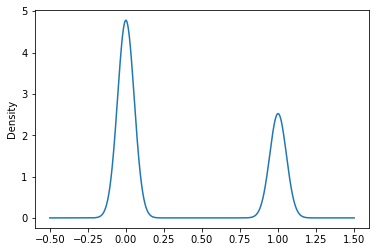

In [346]:
f = 'Var198'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = factorize(csv[f])
print(len(csv[f][(csv[f]==0)]))
csv[f] = threshold_factorization(csv[f],2800,1000,30)
csv[f] = standarize(csv[f])
# csv[f].plot.kde()

In [347]:
f = 'Var197'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = factorize(csv[f])
csv[f] = threshold_factorization(csv[f],10000,1000,100)
# plot(csv[f],sort=True,log=True)
csv[f] = standarize(csv[f])

In [348]:
f = 'Var196'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = factorize(csv[f])
# plot(csv[f],sort=True,log=True)
csv[f] = standarize(csv[f])

In [349]:
f = 'Var195'
delete(f)

In [350]:
f = 'Var194'
delete(f)

In [351]:
f = 'Var193'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = factorize(csv[f])
csv[f] = threshold_factorization(csv[f],10000)
# # plot(csv[f],sort=True,log=False)
csv[f] = standarize(csv[f])

In [352]:
f = 'Var192'
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = factorize(csv[f])
csv[f] = threshold_factorization(csv[f],220,150,30)
# # plot(csv[f],sort=True,log=False)
csv[f] = standarize(csv[f])

In [353]:
f = 'Var191'
delete(f)

In [354]:
f = 'Var190'
delete(f)

In [355]:
f = 'Var189'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()

min: 6.0
max: 642.0
nans: 28978
unique: 98
val_type: <class 'numpy.float64'>
vals per class: 214.51
None


In [356]:
f = 'Var188'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()

min: -6.42
max: 628.62
nans: 48759
unique: 536
val_type: <class 'numpy.float64'>
vals per class: 2.32
None


min: 0.0
max: 910.0
nans: 49298
unique: 58
val_type: <class 'numpy.float64'>
vals per class: 12.1
None


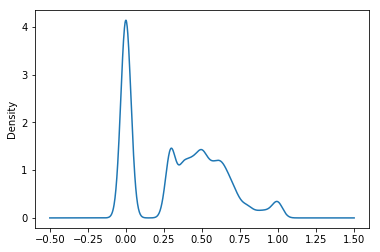

In [357]:
f = 'Var187'
# print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
# csv[f].plot.kde()

In [358]:
f = 'Var186'
# print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()

min: 0.0
max: 102.0
nans: 49298
unique: 14
val_type: <class 'numpy.float64'>
vals per class: 50.14
None


In [359]:
f = 'Var185'
delete(f)

min: 0.0
max: 1200.0
nans: 48759
unique: 32
val_type: <class 'numpy.float64'>
vals per class: 38.78
None


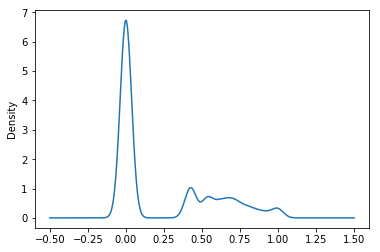

In [360]:
f = 'Var184'
# print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
# csv[f].plot.kde()

min: 0.0
max: 3048400.0
nans: 48759
unique: 375
val_type: <class 'numpy.float64'>
vals per class: 3.31
None


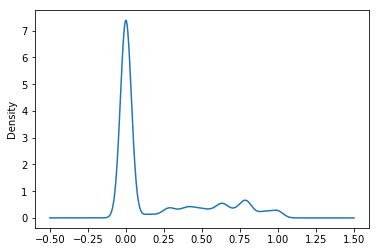

In [361]:
f = 'Var183'
# print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
# csv[f].plot.kde()

min: 0.0
max: 11994780.0
nans: 48421
unique: 820
val_type: <class 'numpy.float64'>
vals per class: 1.93
None


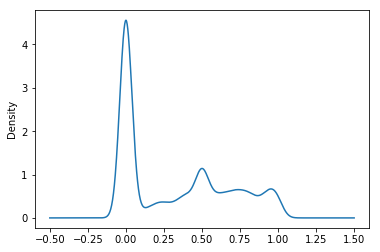

In [362]:
f = 'Var182'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [363]:
f = 'Var181'
delete(f)

min: 0.0
max: 14284830.0
nans: 49298
unique: 548
val_type: <class 'numpy.float64'>
vals per class: 1.28
None


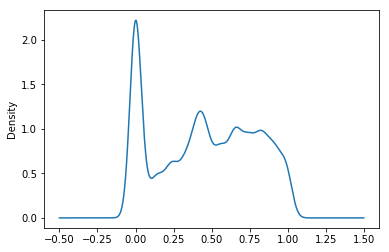

In [364]:
f = 'Var180'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [365]:
f = 'Var179'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()


min: 0.0
max: 890.0
nans: 48421
unique: 16
val_type: <class 'numpy.float64'>
vals per class: 98.69
None


min: 0.0
max: 1345.0
nans: 49354
unique: 31
val_type: <class 'numpy.float64'>
vals per class: 20.84
None


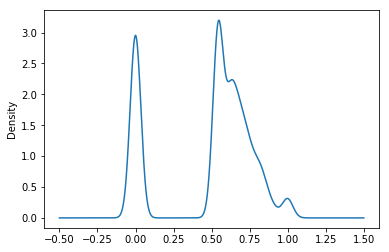

In [366]:
f = 'Var178'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/5))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [367]:
f = 'Var177'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()


min: 0.0
max: 8554350.0
nans: 48759
unique: 444
val_type: <class 'numpy.float64'>
vals per class: 2.8
None


In [368]:
f = 'Var176'
delete(f)

In [369]:
f = 'Var175'
delete(f)

In [370]:
f = 'Var174'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()


min: 0.0
max: 1156.0
nans: 48421
unique: 30
val_type: <class 'numpy.float64'>
vals per class: 52.63
None


In [371]:
f = 'Var173'
delete(f)

min: 0.0
max: 119.0
nans: 48513
unique: 14
val_type: <class 'numpy.float64'>
vals per class: 106.21
None


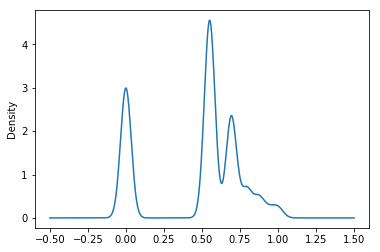

In [372]:
f = 'Var172'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

min: 0.0
max: 5443200.0
nans: 48917
unique: 747
val_type: <class 'numpy.float64'>
vals per class: 1.45
None


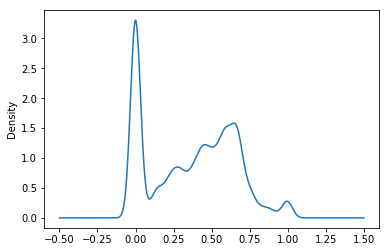

In [373]:
f = 'Var171'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [374]:
f = 'Var170'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()


min: 0.0
max: 957.0
nans: 48759
unique: 19
val_type: <class 'numpy.float64'>
vals per class: 65.32
None


In [375]:
f = 'Var169'
delete(f)


In [376]:
f = 'Var168'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()


min: 0.0
max: 1270.48
nans: 49298
unique: 454
val_type: <class 'numpy.float64'>
vals per class: 1.55
None


In [377]:
f = 'Var167'
delete(f)

In [378]:
f = 'Var166'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()


min: 0.0
max: 2261.0
nans: 48513
unique: 49
val_type: <class 'numpy.float64'>
vals per class: 30.35
None


In [379]:
f = 'Var165'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()


min: 0.0
max: 1209600.0
nans: 49127
unique: 205
val_type: <class 'numpy.float64'>
vals per class: 4.26
None


In [380]:
f = 'Var164'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()


min: 0.0
max: 138.0
nans: 48421
unique: 20
val_type: <class 'numpy.float64'>
vals per class: 78.95
None


min: 0.0
max: 14515200.0
nans: 5009
unique: 22958
val_type: <class 'numpy.float64'>
vals per class: 1.96
None


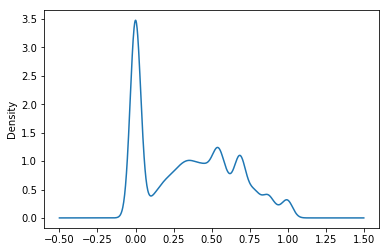

In [381]:
f = 'Var163'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()



In [382]:
f = 'Var162'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()


min: 0.0
max: 10886400.0
nans: 48759
unique: 472
val_type: <class 'numpy.float64'>
vals per class: 2.63
None


In [383]:
f = 'Var161'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()


min: 0.0
max: 81.0
nans: 48421
unique: 10
val_type: <class 'numpy.float64'>
vals per class: 157.9
None


min: 0.0
max: 4862.0
nans: 5009
unique: 403
val_type: <class 'numpy.float64'>
vals per class: 111.64
None


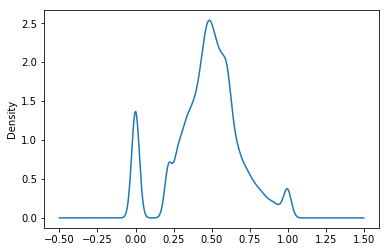

In [384]:
f = 'Var160'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()


In [385]:
f = 'Var159'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()


min: 0.0
max: 99.0
nans: 48759
unique: 11
val_type: <class 'numpy.float64'>
vals per class: 112.82
None


In [386]:
f = 'Var158'
delete(f)


min: 0.0
max: 5440.0
nans: 48871
unique: 65
val_type: <class 'numpy.float64'>
vals per class: 17.37
None


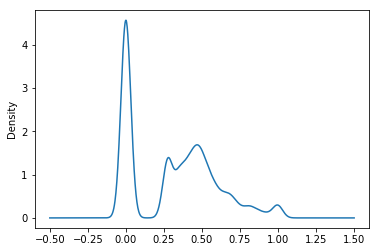

In [387]:
f = 'Var157'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()


min: 0.0
max: 8050.0
nans: 49306
unique: 101
val_type: <class 'numpy.float64'>
vals per class: 6.87
None


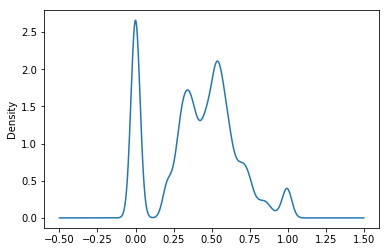

In [388]:
f = 'Var156'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()


In [389]:
f = 'Var155'
delete(f)

min: 0.0
max: 15048560.0
nans: 49298
unique: 389
val_type: <class 'numpy.float64'>
vals per class: 1.8
None


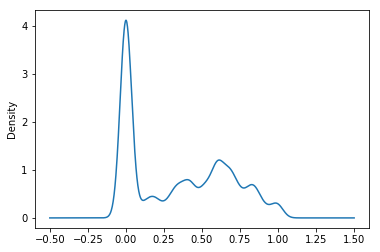

In [390]:
f = 'Var154'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()


In [391]:
f = 'Var153'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()

min: 0.0
max: 13907800.0
nans: 5009
unique: 36398
val_type: <class 'numpy.float64'>
vals per class: 1.24
None


In [392]:
f = 'Var152'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()


min: 0.0
max: 66.0
nans: 48421
unique: 13
val_type: <class 'numpy.float64'>
vals per class: 121.46
None


min: 0.0
max: 1200.0
nans: 49153
unique: 20
val_type: <class 'numpy.float64'>
vals per class: 42.35
None


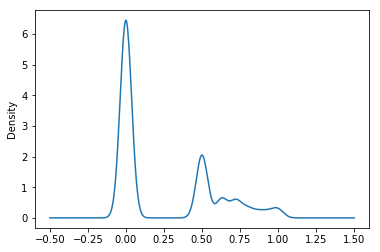

In [393]:
f = 'Var151'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()


min: 0.0
max: 6048000.0
nans: 48421
unique: 601
val_type: <class 'numpy.float64'>
vals per class: 2.63
None


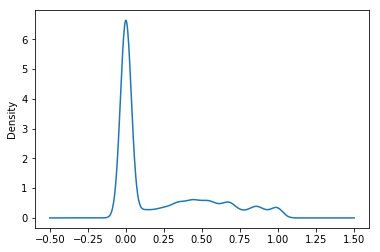

In [394]:
f = 'Var150'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()


min: 0.0
max: 16934400.0
nans: 7230
unique: 18653
val_type: <class 'numpy.float64'>
vals per class: 2.29
None


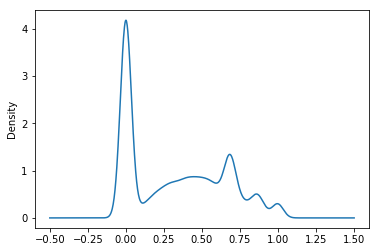

In [395]:
f = 'Var149'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()


min: 0.0
max: 18808.0
nans: 48513
unique: 120
val_type: <class 'numpy.float64'>
vals per class: 12.39
None


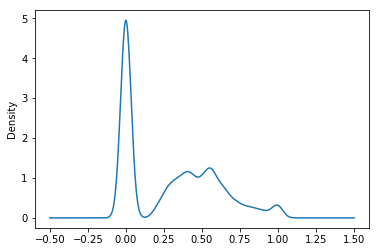

In [396]:
f = 'Var148'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [397]:
f = 'Var147'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()

min: 0.0
max: 8.0
nans: 48513
unique: 6
val_type: <class 'numpy.float64'>
vals per class: 247.83
None


In [398]:
f = 'Var146'
delete(f)

min: 0.0
max: 6126.0
nans: 48421
unique: 89
val_type: <class 'numpy.float64'>
vals per class: 17.74
None


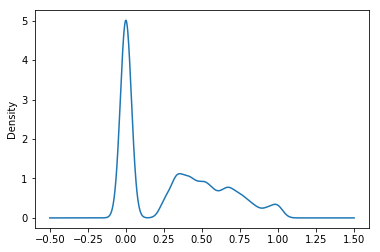

In [399]:
f = 'Var145'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [400]:
f = 'Var144'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()

min: 0.0
max: 81.0
nans: 5529
unique: 11
val_type: <class 'numpy.float64'>
vals per class: 4042.82
None


In [401]:
f = 'Var143'
delete(f)

In [402]:
f = 'Var142'
delete(f)

In [403]:
f = 'Var141'
delete(f)

In [404]:
f = 'Var140'
delete(f)

In [405]:
f = 'Var139'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()

min: 0.0
max: 2700560.0
nans: 48513
unique: 675
val_type: <class 'numpy.float64'>
vals per class: 2.2
None


In [406]:
f = 'Var138'
delete(f)

In [407]:
f = 'Var137'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()

min: 0.0
max: 204.0
nans: 49298
unique: 20
val_type: <class 'numpy.float64'>
vals per class: 35.1
None


In [408]:
f = 'Var136'
delete(f)

In [409]:
f = 'Var135'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()

min: 0.0
max: 710.43
nans: 48421
unique: 680
val_type: <class 'numpy.float64'>
vals per class: 2.32
None


min: 0.0
max: 5735340.0
nans: 5009
unique: 33182
val_type: <class 'numpy.float64'>
vals per class: 1.36
None


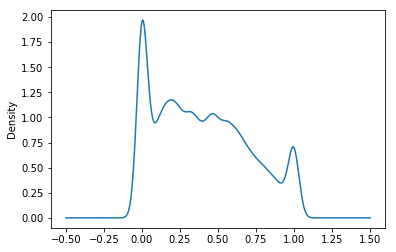

In [410]:
f = 'Var134'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

min: 0.0
max: 15009900.0
nans: 5009
unique: 37604
val_type: <class 'numpy.float64'>
vals per class: 1.2
None


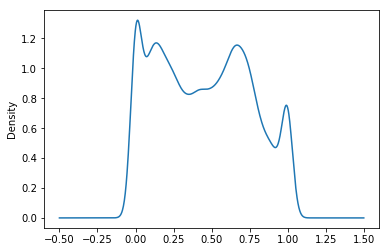

In [411]:
f = 'Var133'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [412]:
f = 'Var132'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()

min: 0.0
max: 184.0
nans: 5009
unique: 20
val_type: <class 'numpy.float64'>
vals per class: 2249.55
None


In [413]:
f = 'Var131'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()

min: 0.0
max: 442233600.0
nans: 49298
unique: 153
val_type: <class 'numpy.float64'>
vals per class: 4.59
None


In [414]:
f = 'Var130'
delete(f)

min: 0.0
max: 636.0
nans: 49298
unique: 46
val_type: <class 'numpy.float64'>
vals per class: 15.26
None


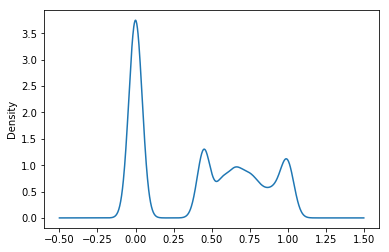

In [415]:
f = 'Var129'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.9))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

min: 0.0
max: 7147.0
nans: 48917
unique: 89
val_type: <class 'numpy.float64'>
vals per class: 12.17
None


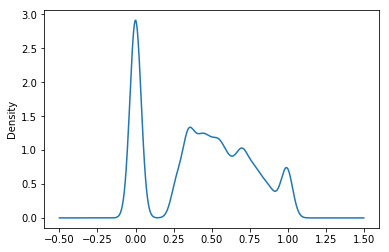

In [416]:
f = 'Var128'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [417]:
f = 'Var127'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()

min: 0.0
max: 2480.0
nans: 48917
unique: 40
val_type: <class 'numpy.float64'>
vals per class: 27.08
None


In [418]:
f = 'Var126'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()

min: -32.0
max: 68.0
nans: 13920
unique: 52
val_type: <class 'numpy.float64'>
vals per class: 693.85
None


min: 0.0
max: 5436045.0
nans: 5539
unique: 10506
val_type: <class 'numpy.float64'>
vals per class: 4.23
None


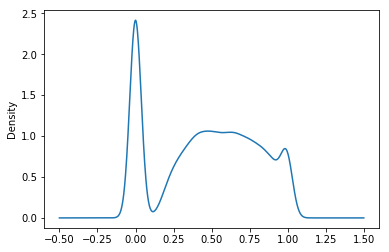

In [419]:
f = 'Var125'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/4))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [420]:
f = 'Var124'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()

min: 0.0
max: 9676800.0
nans: 48421
unique: 348
val_type: <class 'numpy.float64'>
vals per class: 4.54
None


min: 0.0
max: 13086.0
nans: 5009
unique: 299
val_type: <class 'numpy.float64'>
vals per class: 150.47
None


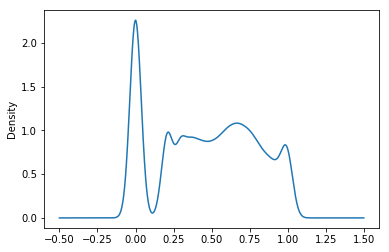

In [421]:
f = 'Var123'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [422]:
f = 'Var122'
delete(f)

In [423]:
f = 'Var121'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()

min: 0.0
max: 672.0
nans: 49298
unique: 34
val_type: <class 'numpy.float64'>
vals per class: 20.65
None


In [424]:
f = 'Var120'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()

min: 0.0
max: 2502.0
nans: 48513
unique: 65
val_type: <class 'numpy.float64'>
vals per class: 22.88
None


min: 0.0
max: 105060.0
nans: 5529
unique: 1488
val_type: <class 'numpy.float64'>
vals per class: 29.89
None


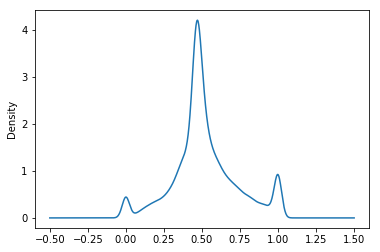

In [425]:
f = 'Var119'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [426]:
f = 'Var118'
delete(f)

In [427]:
f = 'Var117'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()

min: 0.0
max: 2073600.0
nans: 48421
unique: 657
val_type: <class 'numpy.float64'>
vals per class: 2.4
None


In [428]:
f = 'Var116'
delete(f)

min: 0.0
max: 5337.0
nans: 49180
unique: 36
val_type: <class 'numpy.float64'>
vals per class: 22.78
None


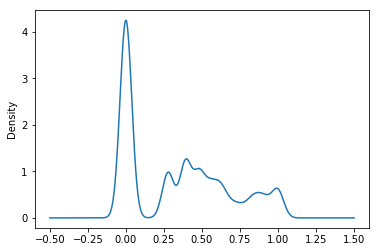

In [429]:
f = 'Var115'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

min: 0.0
max: 4493460.0
nans: 48759
unique: 644
val_type: <class 'numpy.float64'>
vals per class: 1.93
None


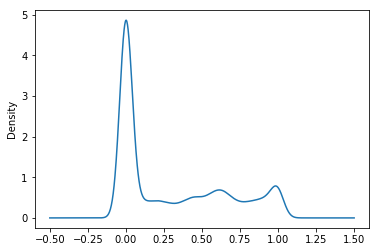

In [430]:
f = 'Var114'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [431]:
f = 'Var113'
delete(f)

min: 0.0
max: 10352.0
nans: 5009
unique: 231
val_type: <class 'numpy.float64'>
vals per class: 194.77
None


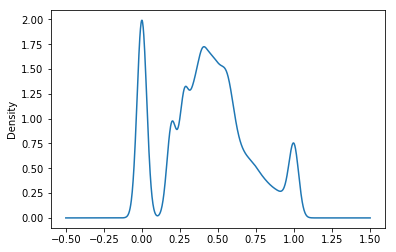

In [432]:
f = 'Var112'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

min: 0.0
max: 3628806.0
nans: 48871
unique: 795
val_type: <class 'numpy.float64'>
vals per class: 1.42
None


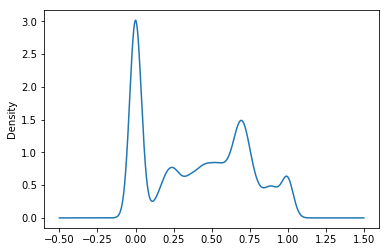

In [433]:
f = 'Var111'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [434]:
f = 'Var110'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()

min: 6.0
max: 30.0
nans: 49298
unique: 6
val_type: <class 'numpy.float64'>
vals per class: 117.0
None


min: 0.0
max: 7456.0
nans: 7230
unique: 210
val_type: <class 'numpy.float64'>
vals per class: 203.67
None


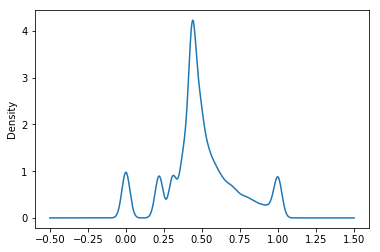

In [435]:
f = 'Var109'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [436]:
f = 'Var108'
delete(f)

In [437]:
f = 'Var107'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)
# ax = csv[f].plot.kde()


min: 0.0
max: 1932.0
nans: 48513
unique: 25
val_type: <class 'numpy.float64'>
vals per class: 59.48
None


In [438]:
f = 'Var106'
delete(f)

In [439]:
f = 'Var105'
delete(f)

In [440]:
f = 'Var104'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],2100)
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)
# ax = csv[f].plot.kde()


min: 0.0
max: 10152.0
nans: 49180
unique: 63
val_type: <class 'numpy.float64'>
vals per class: 13.02
None


In [441]:
f = 'Var103'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
# csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)
# ax = csv[f].plot.kde()


min: 0.0
max: 2002.0
nans: 48513
unique: 40
val_type: <class 'numpy.float64'>
vals per class: 37.17
None


In [442]:
f = 'Var101'
delete(f)

In [443]:
f = 'Var100'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10)
# plot(csv[f].sort_values(),log=False,small=True)
# # ax = csv[f].plot.kde()

min: 0.0
max: 28.0
nans: 49298
unique: 6
val_type: <class 'numpy.float64'>
vals per class: 117.0
None


min: 0.0
max: 2848.0
nans: 48421
unique: 48
val_type: <class 'numpy.float64'>
vals per class: 32.9
None


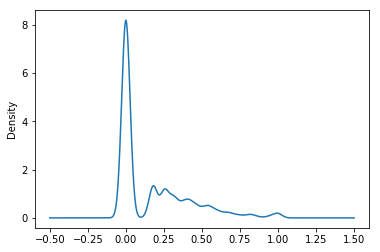

In [444]:
f = 'Var99'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10)
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()
# plot(csv[f].sort_values(),log=False,small=True)

In [445]:
f = 'Var98'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = threshold_factorization(csv[f],100)
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)
# # ax = csv[f].plot.kde()

min: 0.0
max: 1245440.0
nans: 49442
unique: 116
val_type: <class 'numpy.float64'>
vals per class: 4.81
None


In [446]:
f = 'Var97'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])

min: 0.0
max: 36.0
nans: 48513
unique: 8
val_type: <class 'numpy.float64'>
vals per class: 185.88
None


min: 0.0
max: 498.0
nans: 48759
unique: 34
val_type: <class 'numpy.float64'>
vals per class: 36.5
None


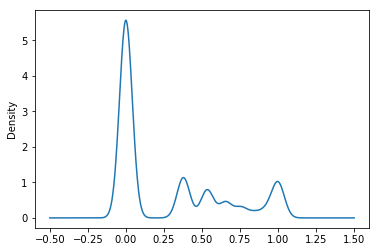

In [447]:
f = 'Var96'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.90))
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [448]:
f = 'Var95'
delete(f)

min: 0.0
max: 5640330.0
nans: 22380
unique: 20003
val_type: <class 'numpy.float64'>
vals per class: 1.38
None


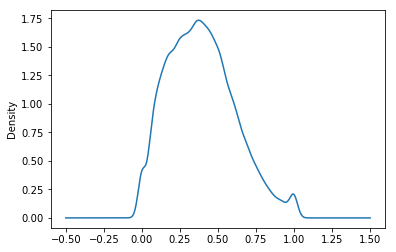

In [449]:
f = 'Var94'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],10000)
# # plot(csv[f].sort_values(),log=False,small=True)
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [450]:
f = 'Var93'
delete(f)

min: 0.0
max: 9404.0
nans: 48871
unique: 120
val_type: <class 'numpy.float64'>
vals per class: 9.41
None


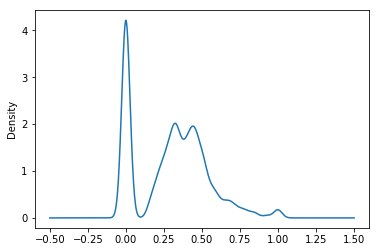

In [451]:
f = 'Var91'
print(stat(f))
csv[f] = csv_org[f].copy()
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],20000)
# # plot(csv[f].sort_values(),log=False,small=True)
# # ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [452]:
f = 'Var90'
delete(f)

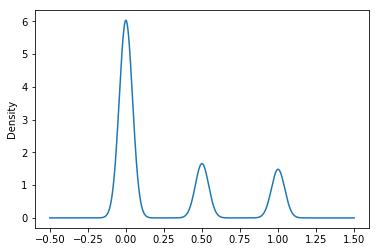

In [453]:
f = 'Var89'
# print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.9))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],20000)
# # plot(csv[f].sort_values(),log=False,small=True)
csv[f].plot.kde()

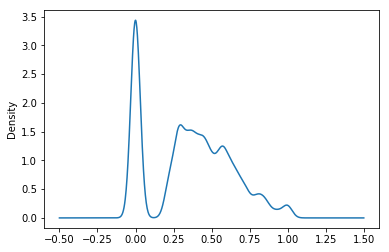

In [454]:
f = 'Var88'
# print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],20000)
# # plot(csv[f].sort_values(),log=False,small=True)
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [455]:
f = 'Var87'
# print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],20000)
# plot(csv[f].sort_values(),log=False,small=True)
# csv[f].plot.kde()

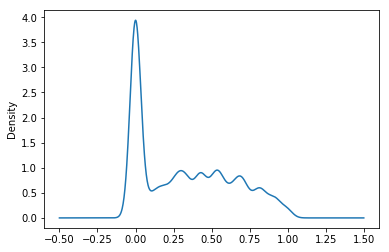

In [456]:
f = 'Var86'
# print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],20000)
# # plot(csv[f].sort_values(),log=False,small=True)
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

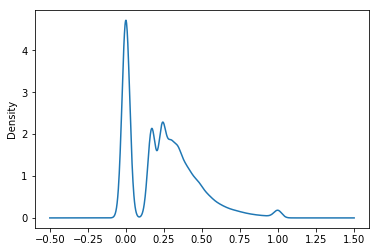

In [457]:
f = 'Var85'
# print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],20000)
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

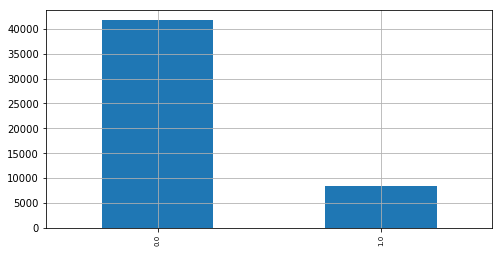

In [530]:
f = 'Var84'
# print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.90))
csv[f] = threshold_factorization(csv[f],20000)
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)

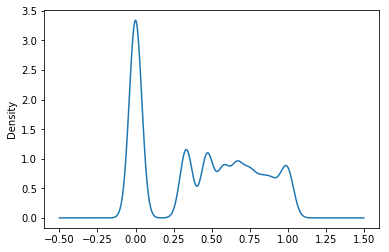

In [459]:
f = 'Var83'
# print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.93))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],2)
# plot(csv[f].sort_values(),log=False,small=True)
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

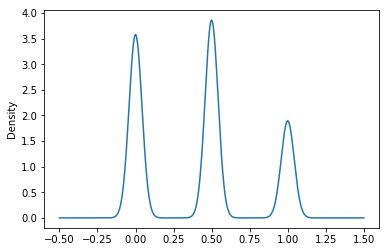

In [460]:
f = 'Var82'
# print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.90))
csv[f] = standarize(csv[f])
# csv[f] = threshold_factorization(csv[f],2)
# plot(csv[f].sort_values(),log=False,small=True)
csv[f].plot.kde()

In [461]:
f = 'Var81'
# print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.90))
csv[f] = standarize(csv[f])
csv[f] = threshold_factorization(csv[f],2)
# plot(csv[f].sort_values(),log=False,small=True)
one_hot_encoding(f)

In [462]:
f = 'Var80'
delete(f)

In [463]:
f = 'Var78'
delete(f)

min: 0.0
max: 666.0
nans: 49298
unique: 24
val_type: <class 'numpy.float64'>
vals per class: 29.25
None


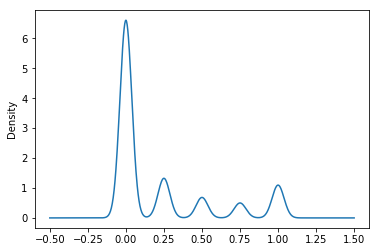

In [464]:
f = 'Var77'
print(stat(f))
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.90))
csv[f] = standarize(csv[f])
# # plot(csv[f].sort_values(),log=False,small=True)
csv[f].plot.kde()

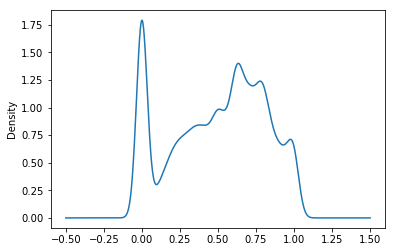

In [465]:
f = 'Var76'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.97))
csv[f] = standarize(csv[f])
# # plot(csv[f].sort_values(),log=False,small=True)
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

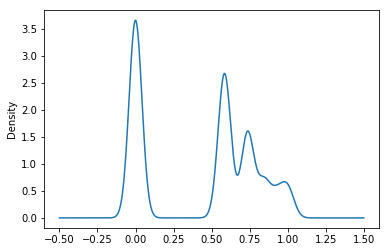

In [466]:
f = 'Var75'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [467]:
f = 'Var74'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.7))
csv[f] = threshold_factorization(csv[f],20000,10000)
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)


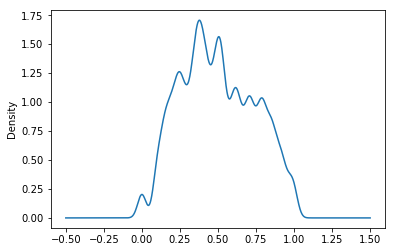

In [468]:
f = 'Var73'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/2))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [469]:
f = 'Var72'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)
# csv[f].plot.kde()

In [470]:
f = 'Var71'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.80))
csv[f] = threshold_factorization(csv[f],12000,8000)
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)

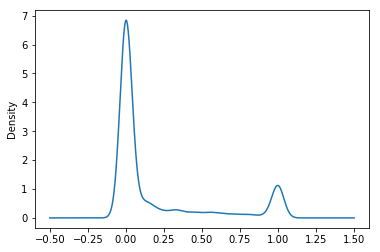

In [471]:
f = 'Var70'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.90))
csv[f] = standarize(csv[f])
# # plot(csv[f].sort_values(),log=False,small=True)
csv[f].plot.kde()

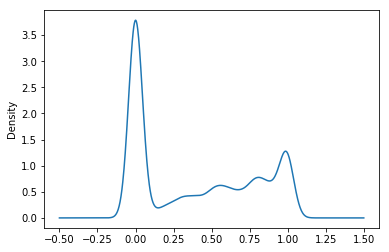

In [472]:
f = 'Var69'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.90))
csv[f] = standarize(csv[f])
# # plot(csv[f].sort_values(),log=False,small=True)
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [473]:
f = 'Var68'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],10000)
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)

In [474]:
f = 'Var67'
delete(f)

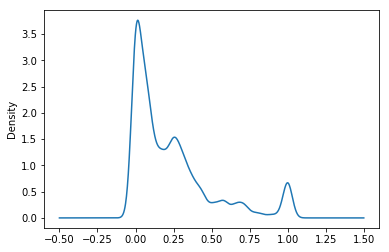

In [475]:
f = 'Var66'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)
csv[f].plot.kde()

In [476]:
f = 'Var65'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)

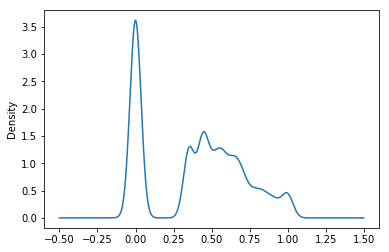

In [477]:
f = 'Var63'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.97))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [478]:
f = 'Var62'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
csv[f] = threshold_factorization(csv[f],20000)
# plot(csv[f].sort_values(),log=False,small=True)

In [479]:
f = 'Var61'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],8000,2000)
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),log=False,small=True)

In [480]:
f = 'Var60'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.9))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

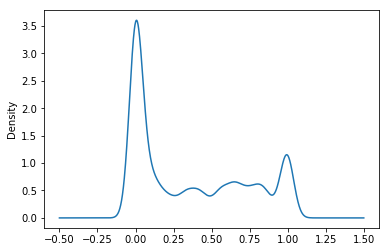

In [481]:
f = 'Var59'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.90))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

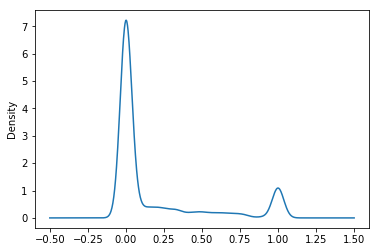

In [482]:
f = 'Var58'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.9))
csv[f] = standarize(csv[f])
# # plot(csv[f].sort_values(),small=True)
csv[f].plot.kde()

In [483]:
f = 'Var57'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# # plot(csv[f],small=True)

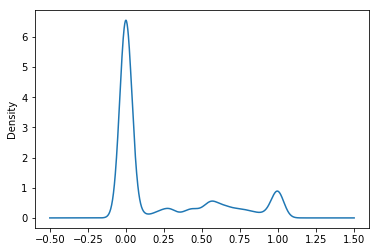

In [484]:
f = 'Var56'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.93))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)
# ax = csv[f].plot.kde()
csv[f] = csv[f].apply(lambda x: np.power(x,1/3))
csv[f] = standarize(csv[f])
csv[f].plot.kde()

In [485]:
f = 'Var54'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [486]:
f = 'Var53'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [487]:
f = 'Var51'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [488]:
f = 'Var50'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [489]:
f = 'Var49'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [490]:
f = 'Var47'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],100)
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [491]:
f = 'Var46'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [492]:
f = 'Var44'
csv[f] = csv_org[f]
csv = csv.drop(f, axis=1)

In [493]:
f = 'Var43'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.96))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [494]:
f = 'Var41'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [495]:
f = 'Var40'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [496]:
f = 'Var38'
csv[f] = csv_org[f]
csv = csv.drop(f, axis=1)

In [497]:
f = 'Var37'
csv[f] = csv_org[f]
stat(f)
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],9000,6000)
# plot(csv[f].sort_values(),log=False,small=True)
one_hot_encoding(f)

min: 0.0
max: 11635020.0
nans: 48421
unique: 551
val_type: <class 'numpy.float64'>
vals per class: 2.87


In [498]:
f = 'Var36'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],23)
# plot(csv[f],sort=True,small=True)
one_hot_encoding(f)

In [499]:
f = 'Var35'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [500]:
f = 'Var34'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [501]:
f = 'Var33'
delete(f)

In [502]:
f = 'Var30'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [503]:
f = 'Var29'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])

In [504]:
f = 'Var28'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],100)
csv[f] = standarize(csv[f])

In [505]:
f = 'Var27'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)


In [506]:
f = 'Var26'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)


In [507]:
f = 'Var25'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)


In [508]:
f = 'Var24'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [509]:
f = 'Var23'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [510]:
f = 'Var22'
csv[f] = csv_org[f]
csv = csv.drop(f, axis=1)

In [511]:
f = 'Var21'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [512]:
f = 'Var19'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [513]:
f = 'Var18'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
csv[f] = cast(csv[f],-100,696)
# plot(csv[f].sort_values(),small=True)

In [514]:
f = 'Var17'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,185)
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [515]:
f = 'Var16'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [516]:
f = 'Var14'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],2000)
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [517]:
f = 'Var13'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
csv[f] = cast(csv[f],-100,5000)
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [518]:
f = 'Var12'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,64)
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [519]:
f = 'Var11'
stat(f)
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

min: 8.0
max: 40.0
nans: 48760
unique: 6
val_type: <class 'numpy.float64'>
vals per class: 206.67


In [520]:
f = 'Var10'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(csv[f].median())
csv[f] = threshold_factorization(csv[f],1)
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [521]:
f = 'Var9'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(csv[f].median())
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [522]:
f = 'Var7'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
csv[f] = cast(csv[f],-100,56)
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [523]:
f = 'Var6'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)

In [524]:
f = 'Var5'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
csv[f] = threshold_factorization(csv[f],1000,7,5,4,2,1)
# plot(csv[f].sort_values(),small=True)
binary_encoding(f)

In [525]:
f = 'Var4'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(7)
csv[f] = standarize(csv[f])
# # plot(csv[f].sort_values(),small=True)

In [526]:
f = 'Var3'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
csv[f] = threshold_factorization(csv[f],1000,100,1)
# plot(csv[f].sort_values(),sort=True,small=True)
one_hot_encoding(f)

In [527]:
f = 'Var2'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
# plot(csv[f].sort_values(),small=True)
one_hot_encoding(f)

In [528]:
f = 'Var1'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
csv[f] = cast(csv[f],-100,64)
csv[f] = standarize(csv[f])
# plot(csv[f].sort_values(),small=True)